# Regresión de Soporte Vectorial (SVR)

## Importamos nuestras librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importamos nuestro Conjunto de Datos (Dataset)

In [5]:
dataset = pd.read_csv('polynomial-regression.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values
dataset

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [6]:
print(X)

[[  60]
 [  70]
 [  80]
 [ 100]
 [ 120]
 [ 150]
 [ 200]
 [ 250]
 [ 300]
 [ 400]
 [ 500]
 [ 750]
 [1000]
 [2000]
 [3000]]


In [7]:
print(y)

[180 180 200 200 200 220 240 240 300 350 350 360 365 365 365]


In [8]:
y = y.reshape(len(y),1)

In [9]:
print(y)

[[180]
 [180]
 [200]
 [200]
 [200]
 [220]
 [240]
 [240]
 [300]
 [350]
 [350]
 [360]
 [365]
 [365]
 [365]]


## Escalado de Variables (No es necesario para este caso, sin embargo se tuvo problemas en encontrar las funciones correctas para la prediccion)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [20]:
print(X)

[[-0.66470748]
 [-0.65236762]
 [-0.64002775]
 [-0.61534802]
 [-0.59066828]
 [-0.55364868]
 [-0.49194935]
 [-0.43025002]
 [-0.36855068]
 [-0.24515202]
 [-0.12175335]
 [ 0.18674332]
 [ 0.49523998]
 [ 1.72922665]
 [ 2.96321331]]


In [21]:
print(y)

[[-1.26213577]
 [-1.26213577]
 [-0.99454515]
 [-0.99454515]
 [-0.99454515]
 [-0.72695453]
 [-0.4593639 ]
 [-0.4593639 ]
 [ 0.34340797]
 [ 1.01238453]
 [ 1.01238453]
 [ 1.14617984]
 [ 1.21307749]
 [ 1.21307749]
 [ 1.21307749]]


## Entrenamiento del modelo SVR con el conjunto de datos

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\rimberth.villca\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predecir un nuevo resultado

In [23]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3000]])).reshape(-1,1))

array([[357.51985805]])

## Visualizando los resultados

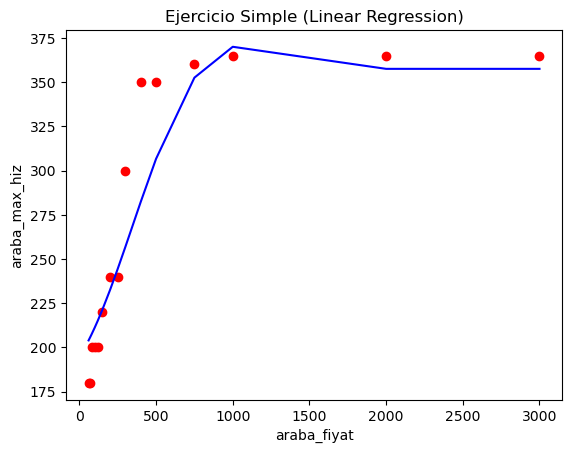

In [24]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Ejercicio Simple (Linear Regression)')
plt.xlabel('araba_fiyat')
plt.ylabel('araba_max_hiz')
plt.show()

## Visualización de los resultados de SVR (para una resolución más alta y una curva más suave)

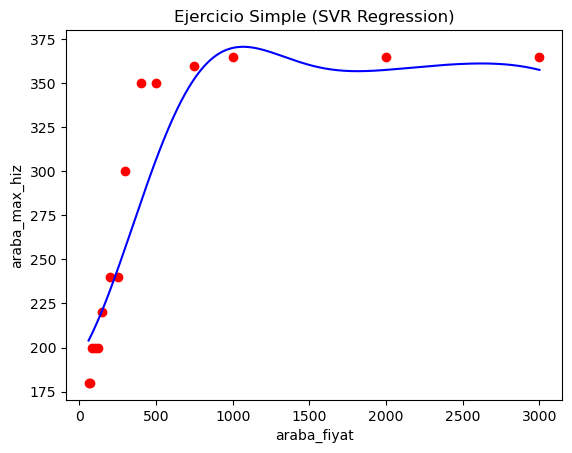

In [25]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Ejercicio Simple (SVR Regression)')
plt.xlabel('araba_fiyat')
plt.ylabel('araba_max_hiz')
plt.show()